<a href="https://colab.research.google.com/github/charliewhitehurst72/Rocinante/blob/master/PivotProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML10 Group Project Outline


<a name="Contents"></a>
## Table of Contents
* [Project Introduction](#Intro)
* [Obtain the Data](#Obtain)
* [Data Dictionary](#Dictionary)
* [Focus on Questions](#Focus)
* [Data Exploration](#Explore)
* [Continue the Exploration](#Continue)
* [Initial Visualizations](#Visualizations)
* [Revisit your Basic Questions](#Basic)
* [Revisit your Prediction Problems](#Prediction)
* [Seaborn Pairplots](#Seaborn)
* [Machine Learning](#ML)
* [Regression](#Regression)
* [Classification](#Classification)
* [Communicate the Results](#Results)

<a name="Intro"></a>
## Project Introduction

Our group has decided to work with a data set of IMDb movies. We chose this data due to it having so much information as well as us finding it the most interesting. This data set has 22 columns and over 85,000 rows.

As we work through this worksheet we will go more in depth of our questions, cleanup, and exploration.




[Back to Table of Contents](#Contents)

In [ ]:
! git clone https://github.com/areed106/movie_project.git

Cloning into 'movie_project'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 3 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), done.


In [ ]:
# Import Python packages for the data exploration to follow
# Create the intial dataframe from your dataset
# View the a few columns from the dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


df = pd.read_csv('https://raw.githubusercontent.com/areed106/movie_project/main/IMDb%20movies.csv')
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,Alexander Black,Alexander Black Photoplays,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,Charles Tait,J. and N. Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,"Urban Gad, Gebhard Schätzler-Perasini",Fotorama,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,Victorien Sardou,Helen Gardner Picture Players,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",Dante Alighieri,Milano Film,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0


In [ ]:
# Show the columns of the dataframe
df.columns

Index(['imdb_title_id', 'title', 'original_title', 'year', 'date_published',
       'genre', 'duration', 'country', 'language', 'director', 'writer',
       'production_company', 'actors', 'description', 'avg_vote', 'votes',
       'budget', 'usa_gross_income', 'worlwide_gross_income', 'metascore',
       'reviews_from_users', 'reviews_from_critics'],
      dtype='object')

In [ ]:
df.dtypes


imdb_title_id             object
title                     object
original_title            object
year                      object
date_published            object
genre                     object
duration                   int64
country                   object
language                  object
director                  object
writer                    object
production_company        object
actors                    object
description               object
avg_vote                 float64
votes                      int64
budget                    object
usa_gross_income          object
worlwide_gross_income     object
metascore                float64
reviews_from_users       float64
reviews_from_critics     float64
dtype: object

<a name="Dictionary"></a>
## Create a Data Dictionary

ALL OBJECTS ARE STRINGS EXCEPT- Genre, Writer, Director, & Actors which are lists


'imdb_title_id'- unique numeric movie ID

'title'- Movie Title-

'original_title'- Title the movie was released with-

'year'- year of release

'date_published'- date of release

'category'- movie genre

'category_num' - integer index for 'category'

'duration'- duration (in minutes)

'countries'- movie's country of origin

'country_num' - integer index for 'countries'

'language'- movie language

'directors'- director name

'directors_num' - integer index for 'directors'

'writer'- writer name

'production_company'- production company

'actors'- actor names

'description'- plot descrption

'avg_vote'- average vote

'votes'- number of votes received

'budget'- budget

'usa_gross_income' - USA gross income

'worlwide_gross_income'- worldwide gross income

'metascore'- metascore rating

'reviews_from_users'- number of reviews from users

'reviews_from_critics'- number of reviews from critics

[Back to Table of Contents](#Contents)

<a name="Focus"></a>
## Focus on the Questions

**PREDICTION QUESTIONS**

1. Can we somewhat accurately predict the genre of a movie based on its duration, votes, director, country of origin, number of critic reviews, and year?


2. Can we predict a movies average review score, based duration, votes, director, country of origin, number of critic reviews, and year?

**BASIC QUESTIONS**

1. What is the most common Genre of movie?

2. What country has made the most movies in the dataset?

3. What year has the highest number of movies in the dataset?

**Discuss the reasons each is of interest.**
1. It helps us to establish a baseline to possible predict interest in the movie.

2. Helps to establish how many times we can run this movie in a single day.

3. Helps determine which Genre is the most popular

4. Helps to establish film as an artform in a given country/economic development

5. Have more movies been made more recently or in previous years. Have we swapped to other forms of entertainment.

[Back to Table of Contents](#Contents)

<a name="Explore"></a>
## Data Exploration

* Use .info to determine if there is any missing data. If so, make the decision (with a brief explanation) of how you will handle it (drop rows, fill with avg values, other options).

* Use .describe to determine if there are any outliers, and get a general feel for the distribution of each column.




[Back to Table of Contents](#Contents)

In [ ]:
#Dropped these columns due to the high amount of NA values associated with each of them. 
#In order to save as much of our data as possible, we dropped columns first, then dropped NA rows.
df.drop(['budget', 'usa_gross_income', 'worlwide_gross_income', 'metascore'], axis=1, inplace=True)

In [ ]:
df.dropna(inplace=True)

In [ ]:
#We did this to check and ensure the rows dropped from our dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65516 entries, 0 to 85851
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   imdb_title_id         65516 non-null  object 
 1   title                 65516 non-null  object 
 2   original_title        65516 non-null  object 
 3   year                  65516 non-null  object 
 4   date_published        65516 non-null  object 
 5   genre                 65516 non-null  object 
 6   duration              65516 non-null  int64  
 7   country               65516 non-null  object 
 8   language              65516 non-null  object 
 9   director              65516 non-null  object 
 10  writer                65516 non-null  object 
 11  production_company    65516 non-null  object 
 12  actors                65516 non-null  object 
 13  description           65516 non-null  object 
 14  avg_vote              65516 non-null  float64
 15  votes              

In [ ]:
df.describe()

,duration,avg_vote,votes,reviews_from_users,reviews_from_critics
count,65516.00000,65516.000000,6.551600e+04,65516.000000,65516.000000
mean,99.93426,5.928547,1.228064e+04,53.632380,30.222358
std,21.65681,1.206441,6.101898e+04,193.926622,61.317799
min,41.00000,1.000000,9.900000e+01,1.000000,1.000000
25%,88.00000,5.300000,2.730000e+02,5.000000,4.000000
50%,96.00000,6.100000,7.150000e+02,12.000000,9.000000
75%,108.00000,6.800000,2.859000e+03,33.000000,27.000000
max,808.00000,9.700000,2.278845e+06,10472.000000,999.000000


We dropped several columns due to them having so many NULL values. We had to drop a few columns and then we went in and dropped NA values in the rows so that our data is uniform. 


<a name="Continue"></a>
## Continue the Exploration

[Back to Table of Contents](#Contents)

In [ ]:
#This was used to check to ensure no duplicates were in this column
#These unique identifiers are tied to an individual movie
df['imdb_title_id'].is_unique

True

In [ ]:
#This row was giving us an issue when we tried to convert to covert the column to a numeric value so we dropped it.
df.drop([83917], inplace=True)

In [ ]:
#We conveerted year to numeric since it was originally an object.
df["year"] = pd.to_numeric(df["year"])
df.head()


,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,Alexander Black,Alexander Black Photoplays,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,Charles Tait,J. and N. Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,7.0,7.0
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,Victorien Sardou,Helen Gardner Picture Players,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,25.0,3.0
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",Dante Alighieri,Milano Film,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,31.0,14.0
5,tt0002199,"From the Manger to the Cross; or, Jesus of Naz...","From the Manger to the Cross; or, Jesus of Naz...",1912,1913,"Biography, Drama",60,USA,English,Sidney Olcott,Gene Gauntier,Kalem Company,"R. Henderson Bland, Percy Dyer, Gene Gauntier,...","An account of the life of Jesus Christ, based ...",5.7,484,13.0,5.0


In [ ]:
#This was to ensure that year changed to an integer
df.dtypes

imdb_title_id            object
title                    object
original_title           object
year                      int64
date_published           object
genre                    object
duration                  int64
country                  object
language                 object
director                 object
writer                   object
production_company       object
actors                   object
description              object
avg_vote                float64
votes                     int64
reviews_from_users      float64
reviews_from_critics    float64
dtype: object

Take the time to make simple notes about your findings from your exploration. 

**What are you learning about your dataset?**

We learned that our data was not as clean as we were thinking. We had to drop some columns and several rows.

<a name="Visualizations"></a>
## Initial Visualizations

(For bar charts see Notebook #1, #2, and #4. For histograms see Notebook #2.

Use simple bar charts and histograms to explore the contents and distributions of key columns in your data set.




[Back to Table of Contents](#Contents)

In [ ]:
#Many entries had multiple genres, so we needed to split them to parse out the first value from each list.
#We then dropped the Genre column and replaced it with Categories, which contains only one element.




df['categories'] = df['genre'].str.split(',').str[0]
df.drop(['genre'], axis=1, inplace=True)
df['categories']



0          Romance
1        Biography
3            Drama
4        Adventure
5        Biography
           ...    
85839       Action
85842    Animation
85843       Action
85846          War
85851       Comedy
Name: categories, Length: 65515, dtype: object

In [ ]:
#We renamed categories to category
df['category'] = df['categories']
df.drop(['categories'], axis=1, inplace=True)
df.sample(10)

,imdb_title_id,title,original_title,year,date_published,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,reviews_from_users,reviews_from_critics,category
52586,tt1022883,Pig Hunt,Pig Hunt,2008,2008-07-31,99,USA,English,James Isaac,"Robert Mailer Anderson, Zack Anderson",Upcal Entertainment,"Travis Aaron Wade, Tina Huang, Howard Johnson ...",When John takes his friends to his deceased un...,4.7,2418,34.0,55.0,Action
22013,tt0089365,Lily in Love,Lily in Love,1984,1984-10-17,90,"Hungary, USA","English, Hungarian",Károly Makk,Frank Cucci,Hungarofilm,"Christopher Plummer, Maggie Smith, Elke Sommer...",Broadway star Fitzroy Wynn (Christopher Plumme...,5.6,174,4.0,2.0,Comedy
85814,tt9863566,Urbanus: De Vuilnisheld,Urbanus: De Vuilnisheld,2019,2019-02-27,72,Belgium,Dutch,"Joost Van Den Bosch, Erik Verkerk","Jimmy Simons, Urbanus",Eyeworks,"Urbanus, Ben Segers, Sven De Ridder, Sien Egge...",The adults from Tollembeek make a deal with a ...,5.4,110,1.0,1.0,Animation
54294,tt1127180,Drag Me to Hell,Drag Me to Hell,2009,2009-09-11,99,USA,"English, Spanish, Hungarian, Czech",Sam Raimi,"Sam Raimi, Ivan Raimi",Universal Pictures,"Alison Lohman, Justin Long, Lorna Raver, Dilee...",A loan officer who evicts an old woman from he...,6.5,185177,787.0,425.0,Horror
55842,tt1235552,À l'aventure,À l'aventure,2008,2009-04-01,104,France,French,Jean-Claude Brisseau,Jean-Claude Brisseau,Moby Dick Films,"Carole Brana, Arnaud Binard, Nadia Chibani, Li...",A sexually unsatisfied young woman decided to ...,5.5,1840,9.0,21.0,Drama
79792,tt6155084,K.O.,K.O.,2017,2017-06-21,115,France,French,Fabrice Gobert,"Valentine Arnaud, Fabrice Gobert",2.4.7. Films,"Laurent Lafitte, Chiara Mastroianni, Pio Marma...",A CEO for a television channel finds his life ...,5.5,465,2.0,11.0,Thriller
6510,tt0042539,Okinawa,Halls of Montezuma,1951,1951-04-28,113,USA,"English, Japanese",Lewis Milestone,Michael Blankfort,Twentieth Century Fox,"Richard Widmark, Jack Palance, Reginald Gardin...",A company of Marines races against the clock t...,6.6,2435,27.0,20.0,Action
45237,tt0402115,Just Sex and Nothing Else,Csak szex és más semmi,2005,2005-12-08,97,Hungary,Hungarian,Krisztina Goda,"Réka Divinyi, Krisztina Goda",Megafilm,"Judit Schell, Kata Dobó, Sándor Csányi, Károly...",Dora rejects all men when she discovers that h...,6.3,2938,3.0,4.0,Comedy
23655,tt0094328,A Winter Tan,A Winter Tan,1987,1988-09-01,91,Canada,English,"Jackie Burroughs, Louise Clark","Jackie Burroughs, John Frizzell",Canada Council for the Arts,"Jackie Burroughs, Hernando Gonzáles, Anita Ola...","Maryse Holden, a professor, feminist activist ...",6.2,135,5.0,4.0,Drama
84464,tt8591260,Inside Game,Inside Game,2019,2019-11-01,97,USA,English,Randall Batinkoff,Andy Callahan,818 Media Productions,"Betsy Beutler, Johnny Calabro, Robert Capelli ...","In 2007, when NBA referee Tim Donaghy (Eric Ma...",5.8,207,39.0,4.0,Drama


Text(0.5, 1.0, 'Number of Films in Each Category')

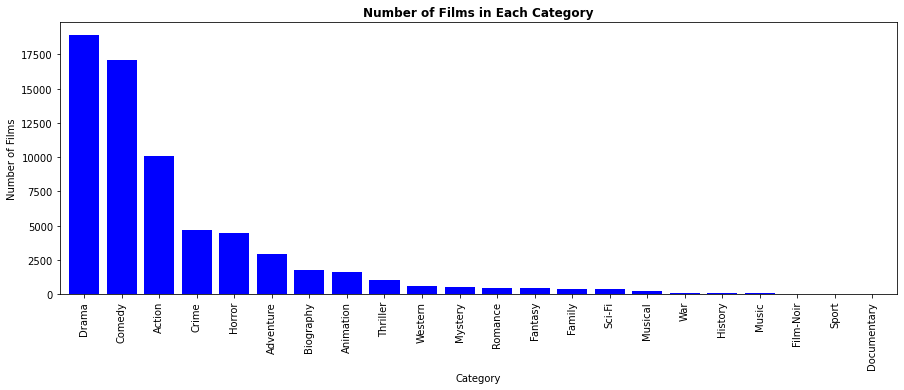

In [ ]:
#What is the most common Genre of movie?

fig = df['category'].value_counts().plot.bar(figsize = (15,5), width = 0.8,color = 'blue')
fig.set_xlabel('Category')
fig.set_ylabel('Number of Films')
fig.set_title('Number of Films in Each Category', fontweight = 'bold')


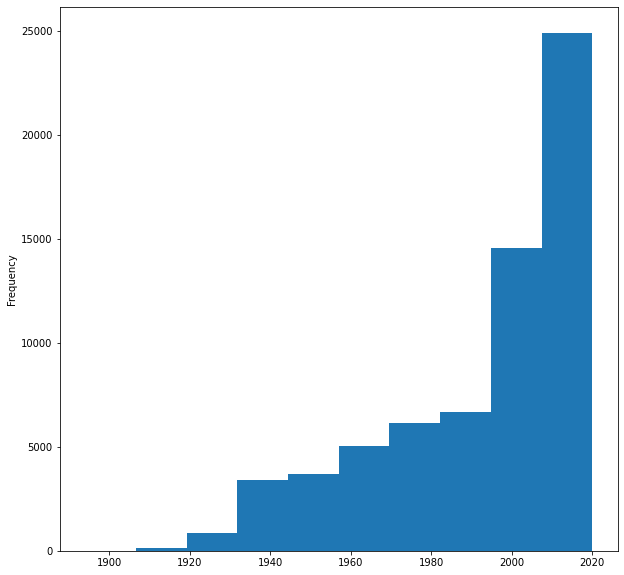

In [ ]:
#What year has the highest number of movies in the dataset?

fig2 = df['year'].plot.hist(figsize = (10,10))
fig.set_title('Distribution of Homes by FinishedArea in Square Feet', fontweight = 'bold');

In [ ]:
#What country has made the most movies in the dataset?

df['countries']=df['country'].str.split(',').str[0]
df.countries.value_counts()

USA           27349
UK             5326
France         4304
India          3488
Italy          2755
              ...  
Libya             1
Myanmar           1
Gibraltar         1
Mauritania        1
Sudan             1
Name: countries, Length: 151, dtype: int64

Text(0.5, 1.0, 'Number of Films in Each Country')

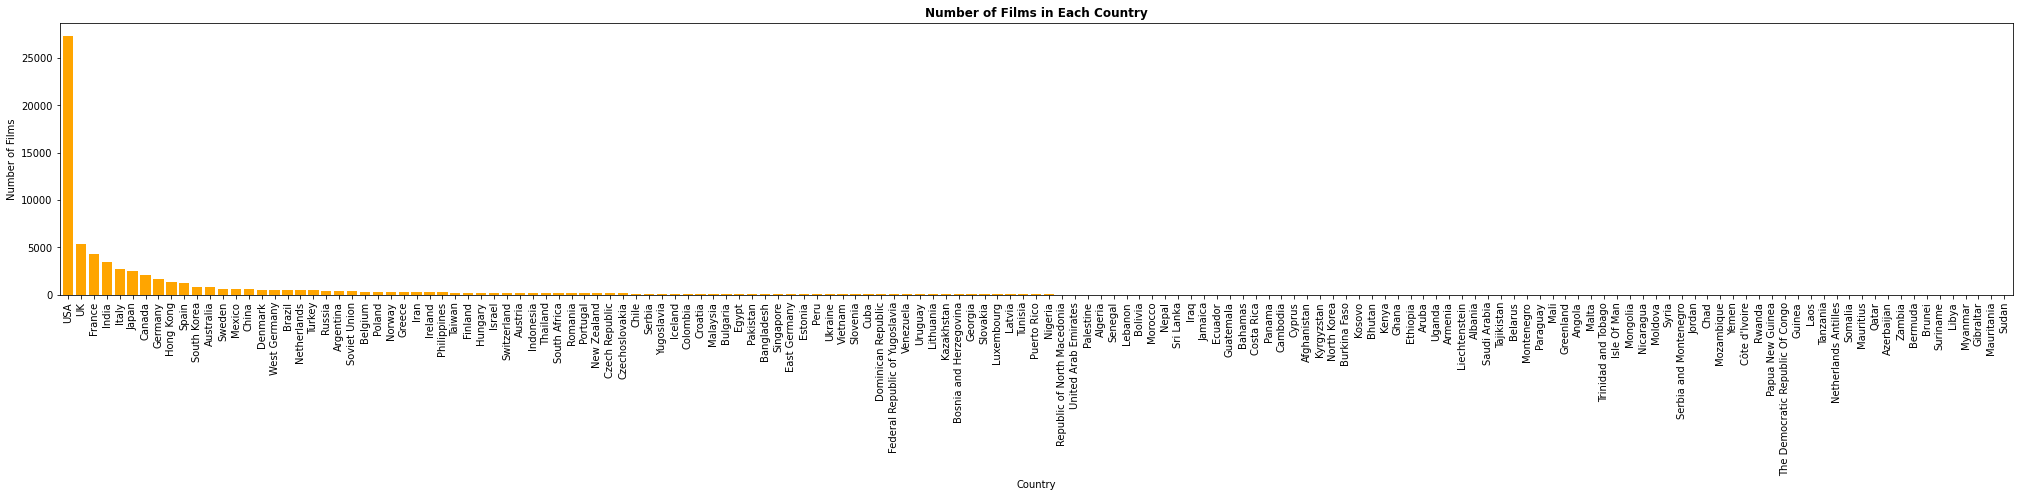

In [ ]:
#What country has made the most movies in the dataset?

fig = df['countries'].value_counts().plot.bar(figsize = (35,5), width = 0.8,color = 'orange')
fig.set_xlabel('Country')
fig.set_ylabel('Number of Films')
fig.set_title('Number of Films in Each Country', fontweight = 'bold')

In [ ]:
df.countries.describe()

count     65515
unique      151
top         USA
freq      27349
Name: countries, dtype: object

Take the time to make simple notes about your findings from your exploration. 

**What are you learning about your dataset?**

More movies are being made after the year 2000. Drama, Comedy, and Action are the 3 top genres/categories. USA, UK, and France made the most movies out of all the countries listed.

<a name="Basic"></a>
## Revisit your Basic Questions

In the text cells below, you should build an outline for the necessary steps the must be taken (with the data) to answer each question.

Most likely, you will need to take advantage of the pandas methods you have learned over the past several weeks to move closer to your goals.

**Take the time to consider:**

Methods such as value_counts() and sort_values(), as well as ...

**Filtering**
(See Notebook #2)

newDf = df[df['column_name'] <= 35]

df['newColumn'] = df.loc[df['column_name'] == 35]['another_column'].str.split()[1]

**Groupby and/or Agg**
(See Notebook #3 and #4)

dfGroup = df.groupby('column_name')['another_column_for_values'].mean()

dfGroupAgg = df.groupby(['column_name','second_column])[['col1','col2','col3']].agg(['mean','median'])

**Or even a Pivot table**
(See Notebook #4)

dfPivot = df.pivot(index = 'Column_For_Index', 
                                columns='Categorical_Column_For_Columns', values='Column_For_Values')

**And if you have the need to combine two dataframes by simply stacking them vertically or horizontally ... you may have the need to use concatenation:**
(See Notebook #4)

dfLarge = pd.concat([df1,df2,df3], axis=1) # to stack horizontally or

dfLarge = pd.concat([df1,df2,df3], axis=0).reset_index() # to stack vertically.




[Back to Table of Contents](#Contents)



### Question 1 Outline:

What is the most common genre of movie? During our initial visualizations, we realized some of our columns contained lists which we didn't want in our data set. We stripped the first element from each entry in the genre column and created a new category column by using .str.split.

Text(0.5, 1.0, 'Number of Films in Each Category')

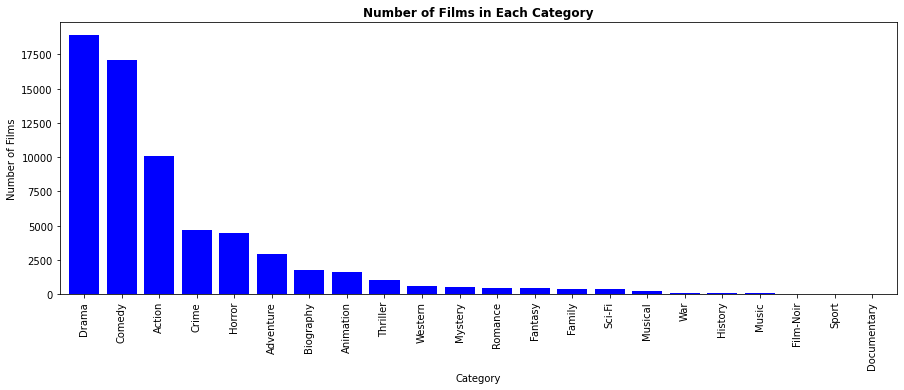

In [ ]:
fig = df['category'].value_counts().plot.bar(figsize = (15,5), width = 0.8,color = 'blue')
fig.set_xlabel('Category')
fig.set_ylabel('Number of Films')
fig.set_title('Number of Films in Each Category', fontweight = 'bold')

The most common genre is drama.

  # Question 2 Outline:

What country has made the most movies in the dataset?

In [ ]:
# Because the original countries column is a list, we need to strip the entries.
df['countries']=df['country'].str.split(',').str[0]
df.countries.value_counts()

USA           27349
UK             5326
France         4304
India          3488
Italy          2755
              ...  
Libya             1
Myanmar           1
Gibraltar         1
Mauritania        1
Sudan             1
Name: countries, Length: 151, dtype: int64

Text(0.5, 1.0, 'Number of Films in Each Country')

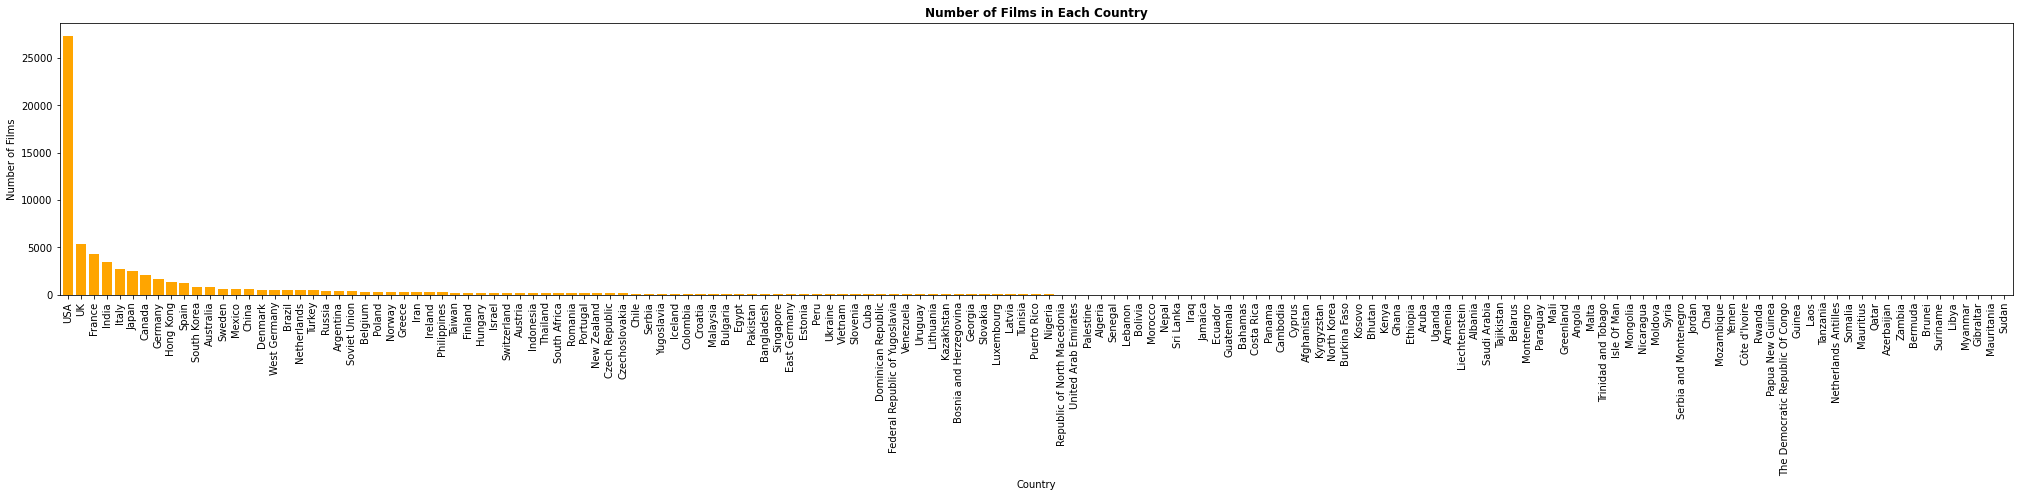

In [ ]:
#Now that we have a column with just one element, we can create a chart.
fig = df['countries'].value_counts().plot.bar(figsize = (35,5), width = 0.8,color = 'orange')
fig.set_xlabel('Country')
fig.set_ylabel('Number of Films')
fig.set_title('Number of Films in Each Country', fontweight = 'bold')

### Question 3 Outline:


  #3 What year has the highest number of movies in the dataset?
We can find this information simply by performing .value_counts, or we can plot our values in a histogram. Not only do we see the year with the highest number of movies, we can visualize the information.

In [ ]:
df.year.value_counts()


2017    2369
2018    2351
2016    2281
2015    2182
2014    2158
        ... 
1913      10
1912       4
1894       1
1906       1
1911       1
Name: year, Length: 112, dtype: int64

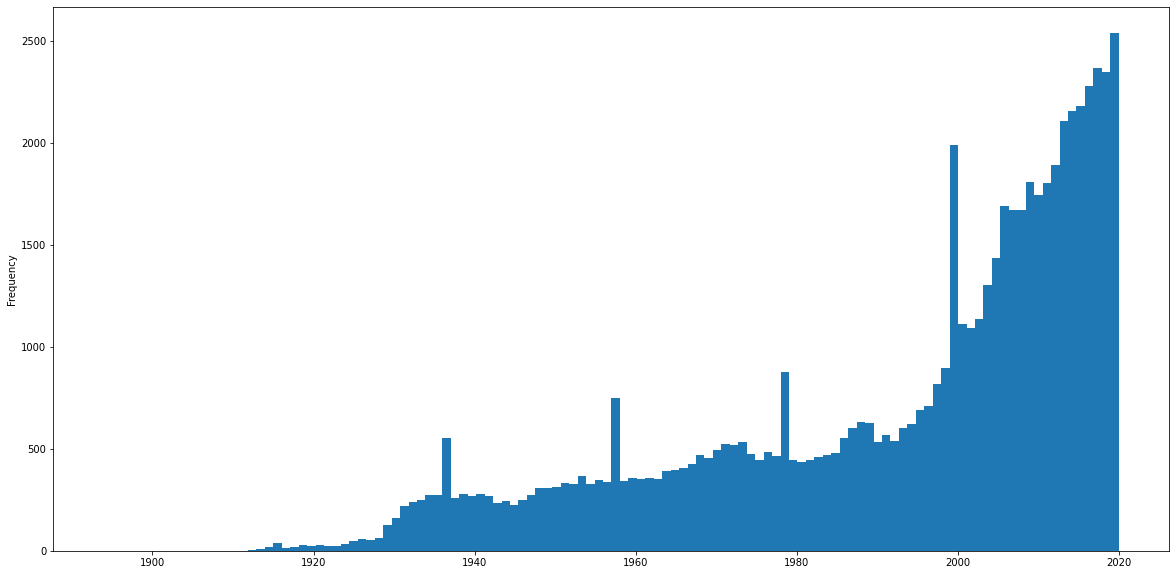

In [ ]:
fig2 = df['year'].plot.hist(figsize = (20,10), bins=120)
fig.set_title('Highest number of movies based in year', fontweight = 'bold');

2017 has 2369 movies for that year, making it the year with the most movies.

<a name="Prediction"></a>
## Revisit your Prediction Problems

1.Can we somewhat accurately predict the genre of a movie based on its duration, votes, director, country of origin, number of critic reviews, and year?

2.Can we predict a movies average review score, based duration, votes, director, country of origin, number of critic reviews, and year?

## State your Problems here ...


* While we were able to get clearer answers to our basic questions using histograms, groupby, value counts and describe, we start to run into issues with Seaborn. Our Seaborn data does not suggest the obvious correlations between data values as we had hoped. We can see some correlation between years and the number of votes, but there is no obvious visual correlation for our initial predictive questions.

We decided to to make the average vote the target of our regression models. and category/genres the target of our classification predictions.






[Back to Table of Contents](#Contents)


<a name="Seaborn"></a>
## Additional visualizations with Seaborn pairplots to help determine which features may be most helpful in predicting your target value in the Machine Learning process to follow. 
(See Notebook #6 and #7)





[Back to Table of Contents](#Contents)

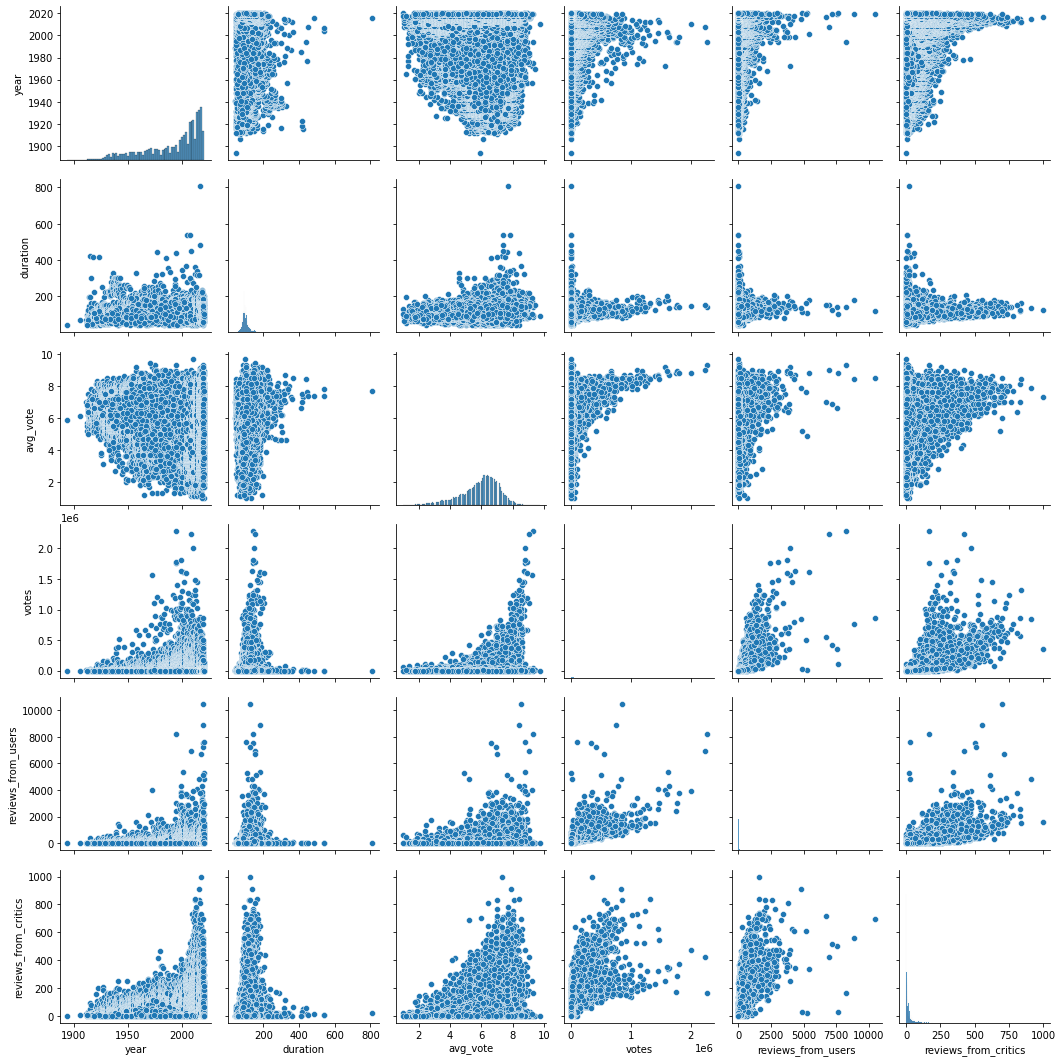

In [ ]:

# We can use seaborn's pairplot to help us consider the distributions of 
# our numerical columns as well as the relationships among each pair
# of these columns.

import seaborn as sns

# Create pairplots (a grid of scatter plots and distribution plots)
# for each pair of columns listed from a dataframe
sns.pairplot(df)

<a name="ML"></a>
## Let's begin the Machine Learning Process.
(See Notebooks #6, #7, and #8)





[Back to Table of Contents](#Contents)

<a name="Regression"></a>
### 1) Choose the Features and a Target for your Regression problem.

JAMEISHA


[Back to Table of Contents](#Contents)


In [ ]:
df['directors']=df['director'].str.split(',').str[0]
df.directors.value_counts()
df['directors_num']=pd.factorize(df['directors'])[0]
df['category_num'] = pd.factorize(df['category'])[0]
df['country_num'] = pd.factorize(df['countries'])[0]
df[['category', 'category_num', 'countries', 'country_num','directors_num','directors']].sample(20) 

#We needed to change a few columns to intergers in order to use this data for machine learning 

,category,category_num,countries,country_num,directors_num,directors
34034,Comedy,7,USA,0,7165,Lynn Hamrick
15843,Horror,11,UK,11,2693,Bill Bain
25184,Comedy,7,USA,0,3690,Jack Fisk
31981,Crime,4,Hong Kong,38,4554,Andrew Lau
83772,Comedy,7,India,23,16880,Prakash Kovelamudi
22805,Horror,11,USA,0,4415,Anthony Perkins
66171,Horror,11,USA,0,15143,Hank Braxtan
32571,Sci-Fi,13,Finland,24,7323,Risto Jarva
8224,Comedy,7,USA,0,1009,Frank Tashlin
34376,Crime,4,USA,0,6845,Robert Angelo


In [ ]:
# Define the features and the target from our dataset.

# Features
X = df[['reviews_from_critics']]

# Target
y = df['avg_vote']

Give a brief explanation about why/how you chose your features.

Experiment with various features combinations to determine the 'best' choices.

Give a brief account of your process.



### 2) Create Training and Testing sets

In [ ]:
# import the package to create the Training and Testing split.

from sklearn.model_selection import train_test_split

# The code below splits our X and y into training and testing sets. 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

### 3) Feature Scaling

In [ ]:
# We now transform our feature values to the number
# of Standard Deviations each value is from its mean.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

X_train[:5]

array([[-0.36245016],
       [-0.45980418],
       [-0.31377316],
       [ 2.12007717],
       [ 0.77334665]])

Give a brief explanation for why feature scaling may (or may not) be beneficial (or even essential) with your specific dataset and features.


Scaling was benefial because it made the data more visibly understanding without have the 

## Simple Linear Regression: Select, Instantiate, Fit, Score

In [ ]:
## Select/Import the Model.
    
from sklearn import linear_model
 
## Instantiate the Linear Regression model. 

LinMod = linear_model.LinearRegression()

## Fit the model on the training data.

LinMod.fit(X_train, y_train)
    
## See how the model performs on the test data.

LinMod.score(X_test, y_test)



0.04343208571680124

### Simple Linear Regression: Evaluate ... ScatterPlots

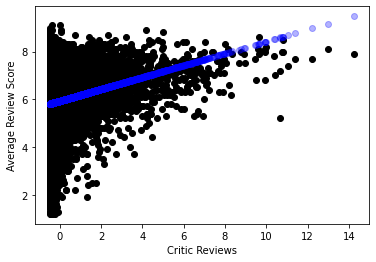

In [ ]:
# Predicted values of y based upon the model


# Use scatter plots if helpful to show test vs predicted values.



# Predicted values of y based upon the model
y_pred = LinMod.predict(X_test)

# Plot outputs

plt.scatter(X_test, y_test,  color='black')
plt.scatter(X_test, y_pred, color='blue',  alpha=0.3)
plt.xlabel('Critic Reviews')
plt.ylabel('Average Review Score')
plt.show()



## Multiple Linear Regression: Select, Instantiate, Fit, Score

In [ ]:


#Target
X = df[['votes', 'directors_num','country_num','duration', 'year','reviews_from_critics']]
#X = df[['year','directors_num']]
y = df['avg_vote']
# import the package to create the Training and Testing split.

from sklearn.model_selection import train_test_split

# The code below splits our X and y into training and testing sets. 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
# We now transform our feature values to the number
# of Standard Deviations each value is from its mean.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

X_train[:5]

from sklearn import linear_model
 
## Instantiate the Linear Regression model. 

MLR = linear_model.LinearRegression()

## Fit the model on the training data.

MLR.fit(X_train, y_train)
    
## See how the model performs on the test data.

MLR.score(X_test, y_test)

0.2222966072311343

In [ ]:
X_train[:5]


array([[-0.19062593,  1.77421114, -0.41277205, -1.17347312,  0.86741753,
         0.07622752],
       [-0.18762087,  0.86716432, -0.525048  ,  0.81051806,  0.90749705,
        -0.3614864 ],
       [-0.1842819 ,  1.79186621, -0.63732396, -0.08700176,  0.94757658,
        -0.47496779],
       [-0.19571388, -1.1736204 , -0.63732396, -0.55938061, -2.1786262 ,
        -0.47496779],
       [-0.19415569, -1.16288612, -0.63732396, -1.12623523, -2.33894429,
        -0.44254454]])

### Multiple Linear Regression: Evaluate ... ScatterPlots

In [ ]:
# Predicted values of y based upon the model


# Use scatter plots if helpful to show test vs predicted values.
r_sq = MLR.score(X_test, y_test)
print('coefficient of determination:', r_sq)

print('intercept:', MLR.intercept_)

print('slope:', MLR.coef_)

coefficient of determination: 0.2222966072311343
intercept: 5.927564326210206
slope: [ 0.05242331  0.02940446  0.25728007  0.33164726 -0.45049749  0.26565148]


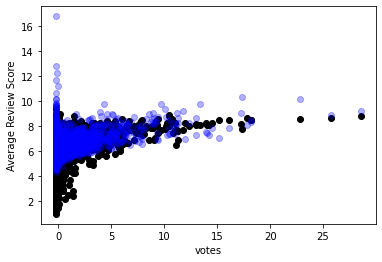

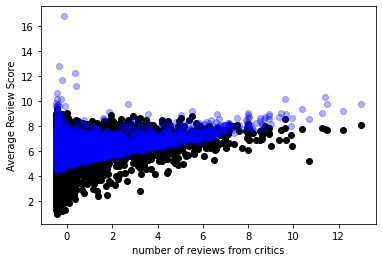

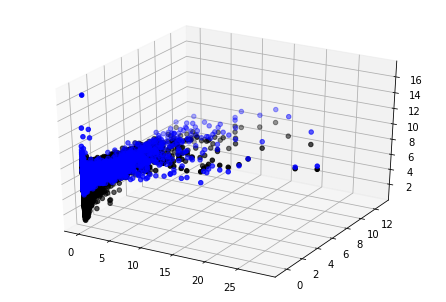

In [ ]:
# Predicted values of y based upon the model
y_pred = MLR.predict(X_test)
# Plot outputs
plt.scatter(X_test[:,0], y_test,  color='black')
plt.scatter(X_test[:,0], y_pred, color='blue',  alpha=0.3)
plt.xlabel('votes')
plt.ylabel('Average Review Score')
plt.show()
plt.scatter(X_test[:,5], y_test,  color='black')
plt.scatter(X_test[:,5], y_pred, color='blue',  alpha=0.3)
plt.xlabel('number of reviews from critics')
plt.ylabel('Average Review Score')
plt.show()
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
fig = pyplot.figure()
ax = Axes3D(fig)
ax.scatter(X_test[:,0],X_test[:,5], y_test,  color='black')
ax.scatter(X_test[:,0],X_test[:,5], y_pred,  color='blue')
pyplot.show()

## K Nearest Neighbors: Select, Instantiate, Fit, Score

In [ ]:

X = df[['votes', 'directors_num','country_num','duration', 'year','reviews_from_critics']]

y = df['avg_vote']
# import the package to create the Training and Testing split.

from sklearn.model_selection import train_test_split

# The code below splits our X and y into training and testing sets. 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## Select/Import the Model.
from sklearn.neighbors import KNeighborsRegressor
    
## Instantiate the Knn model with ... neighbors. 
KNN = KNeighborsRegressor(n_neighbors=100)
    
## Fit the model on the training data.
KNN.fit(X_train, y_train)
    
## See how the model performs on the test data.
KNN.score(X_test, y_test)



0.19121114702310452

Take the time to find the 'best' number of neighbors.

Give a brief account of your process.

###K Nearest Neighbors: Evaluate ... ScatterPlots

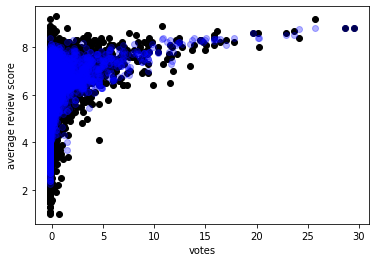

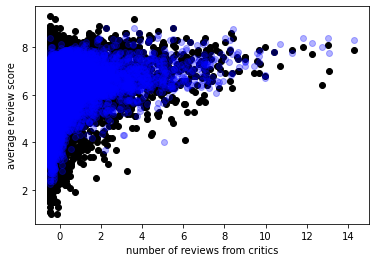

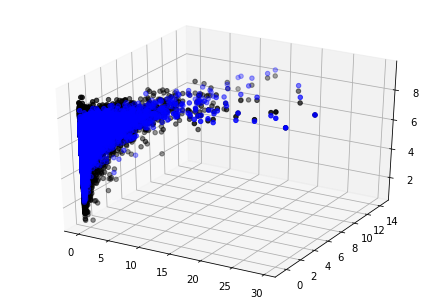

In [ ]:
## Select/Import the Model.
from sklearn.neighbors import KNeighborsRegressor
    
## Instantiate the Knn model with ... neighbors. 
KNN = KNeighborsRegressor(n_neighbors=3)
    
## Fit the model on the training data.
KNN.fit(X_train, y_train)
    
## See how the model performs on the test data.
KNN.score(X_test, y_test)

# Predicted values of y based upon the model
y_pred = KNN.predict(X_test)

# Plot outputs

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

X_train[:5]


from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D


plt.scatter(X_test[:,0], y_test,  color='black')
plt.scatter(X_test[:,0], y_pred, color='blue',  alpha=0.3)
plt.xlabel('votes')
plt.ylabel('average review score')
plt.show()

plt.scatter(X_test[:,5], y_test,  color='black')
plt.scatter(X_test[:,5], y_pred, color='blue',  alpha=0.3)
plt.xlabel('number of reviews from critics')
plt.ylabel('average review score')
plt.show()



fig = pyplot.figure()
ax = Axes3D(fig)

ax.scatter(X_test[:,0],X_test[:,5], y_test,  color='black')
ax.scatter(X_test[:,0],X_test[:,5], y_pred,  color='blue')
pyplot.show()

In [ ]:
df['votes'].max()

2278845

##Random Forest: Select, Instantiate, Fit, Score

In [ ]:
## Select/Import the Model.

## Instantiate the Random Forest model

## Fit the model on the training data.


## See how the model performs on the test data.

from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor(n_estimators=45)

RF.fit(X_train, y_train)

print(RF.score(X_test, y_test))

0.4075696808643017


Take the time to find the 'best' number of estimates.

Give a brief account of your process.


So far Rf has the best score. We adjusted the estimators to 45 and our highest score was 40. 

### Random Forest: Evaluate ... ScatterPlots

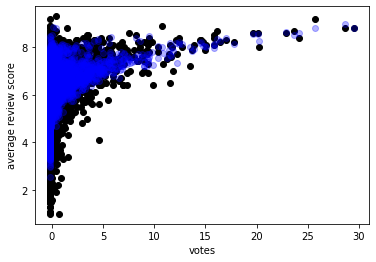

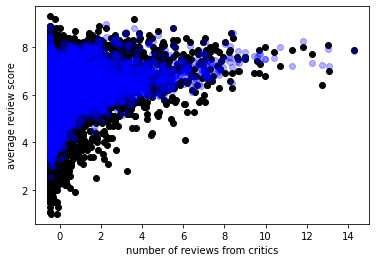

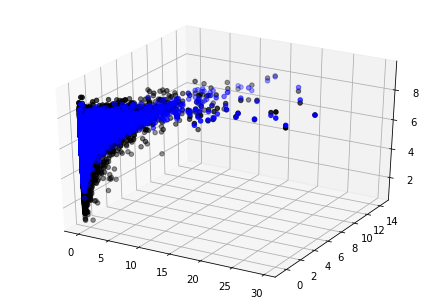

In [ ]:
# Predicted values of y based upon the model



# Use scatter plots if helpful to show test vs predicted values.



# Predicted values of y based upon the model
y_pred = RF.predict(X_test)

# Plot outputs
plt.scatter(X_test[:,0], y_test,  color='black')
plt.scatter(X_test[:,0], y_pred, color='blue',  alpha=0.3)
plt.xlabel('votes')
plt.ylabel('average review score')
plt.show()

plt.scatter(X_test[:,5], y_test,  color='black')
plt.scatter(X_test[:,5], y_pred, color='blue',  alpha=0.3)
plt.xlabel('number of reviews from critics')
plt.ylabel('average review score')
plt.show()

from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

fig = pyplot.figure()
ax = Axes3D(fig)

ax.scatter(X_test[:,0],X_test[:,5], y_test,  color='black')
ax.scatter(X_test[:,0],X_test[:,5], y_pred,  color='blue')
pyplot.show()


<a name="Classification"></a>

*   List item
*   List item


## Move on to consider the **Classification** models. 




[Back to Table of Contents](#Contents)


### 1) Choose the Features and a Target for your problem.

In [ ]:
# Define the features and the target from your dataset.

# Features
X = df[['votes', 'directors_num','country_num','duration', 'year','reviews_from_critics']]

# Target
y = df['category_num']




In [ ]:
df[['category_num', 'category']].sample(50)

,category_num,category
37775,2,Drama
10101,3,Adventure
63699,2,Drama
78095,7,Comedy
65132,4,Crime
23823,17,Animation
11046,2,Drama
27866,7,Comedy
36773,16,Thriller
76850,9,Action


In [ ]:
df.dtypes

imdb_title_id            object
title                    object
original_title           object
year                      int64
date_published           object
duration                  int64
country                  object
language                 object
director                 object
writer                   object
production_company       object
actors                   object
description              object
avg_vote                float64
votes                     int64
reviews_from_users      float64
reviews_from_critics    float64
category                 object
countries                object
directors                object
directors_num             int64
category_num              int64
country_num               int64
dtype: object

Give a brief explanation about why/how you chose your features.

We chose to use the number of votes for a film, the director, country of origin, duration, number of critical reviews, and year of release of that film, because we felt that all of these criteria contributed to trends regarding the genre of films. Certain directors like to make certain types of films, and some countries have a larger output of a given type of film than others. Coupled with the idea that the genre of a film has a slight correlation with the film's length, more viewers see and vote on certain genres of film, and certain genres will be more widely reviewd by critics than others, we felt that these criteria would be the best by which to determine a given film's genre. 

Experiment with various features combinations to determine the 'best' choices.

While we had initially included the average review score and the number of reviews by users, we found that those features served only to muddy the waters in our classification models, and that we got more accurate results with those features removed.

Give a brief account of your process.

In order to do run our models, we first gave each category and director a unique integer ID, so that we could easily feed the features into our models, then we began running the models. Once we ran them the first time, we began paring down our features to optimize our models' accuracy, eventually settling on removing average review score and number of user reviews.


### 2) Create Training and Testing sets

In [ ]:
# import the package to create the Training and Testing split.

# The code below splits our X and y into training and testing sets. 
from sklearn.model_selection import train_test_split

# The code below splits our X and y into training and testing sets.
# Since test_size=0.30, the split will be 70% Training to 30% Testing sets.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2)



### 3) Feature Scaling

In [ ]:
# We now transform our feature values to the number
# of Standard Deviations each value is from its mean.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_train[:5]


array([[-0.18407611,  1.39526468,  1.99686958,  0.27758957,  0.98664802,
         0.63311856],
       [-0.19555478, -0.58412646,  1.49343002, -0.5977792 , -0.25924662,
        -0.46178874],
       [ 0.00609316, -0.7419704 , -0.63220367,  0.55402181,  0.06227458,
         0.09383586],
       [ 0.11349261, -1.11022594, -0.01688866, -0.64385124, -1.66590186,
         0.55140906],
       [-0.19771413,  1.45896599,  0.76623954, -0.22920288,  1.02683817,
        -0.44544684]])

Give a brief explanation for why feature scaling may (or may not) be beneficial (or even essential) with your specific dataset and features.

We believe that feature scaling is very beneficial for our specific dataset, both due to the size of the dataset overall, and due to the range of values contained in some columns of the dataframe, such as duration, which can run from very low, in the case of some short films, to near 800 minutes, for the longest entry in the dataset.

## K Nearest Neighbors: Select, Instantiate, Fit, Score


In [ ]:
## Select/Import the Model.
    
## Instantiate the Knn model with ... neighbors. 
    
## Fit the model on the training data.
    
## See how the model performs on the test data.

from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=45)
KNN.fit(X_train, y_train)
KNN.score(X_test, y_test)

0.3601119308064106

In [ ]:
##Take the time to find the 'best' number of neighbors.

##Give a brief account of your process.


#We changed our neighbors to 45 and it the highest score so far of 36

[link text](https://)###K Nearest Neighbors: Evaluate ... Classification Report

In [ ]:


# Predicted values of y based upon the model
y_pred = KNN.predict(X_test)
# The classification report shows how well the model performed on each possible outcome
# or CityNum in our case.
from sklearn.metrics import classification_report
# The classification report compares what was predicted for the test set
# against what was actually seen in the test set.
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       129
           1       0.07      0.00      0.00       540
           2       0.37      0.58      0.45      5683
           3       0.11      0.00      0.01       857
           4       0.30      0.09      0.14      1341
           5       0.24      0.06      0.09       173
           6       0.00      0.00      0.00       133
           7       0.34      0.45      0.39      5226
           8       0.00      0.00      0.00       115
           9       0.39      0.32      0.35      3017
          10       0.00      0.00      0.00       168
          11       0.34      0.24      0.28      1273
          12       0.00      0.00      0.00        12
          13       0.00      0.00      0.00       111
          14       0.00      0.00      0.00        65
          15       0.00      0.00      0.00         7
          16       0.00      0.00      0.00       303
          17       0.50    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Offer a brief interpretation of the classification report.

It appears that the K Nearest Neighbors model is most accurate at predicting the Drama, Comedy, and Action categories, with each above 30% on the f1-score, and Horror not far behind, at just under 30%. It would appear that these are the most accurate due in some part to the larger distributions of films in these categories, although with Horror, there are categories with more films in them for which the model was less accurate. However, given that Horror directors tend to make Horror movies almost exclusively, the model may have a more reliable way to predict for that category, via director, than for other categories with similar numbers of films in the test set.

##Random Forest: Select, Instantiate, Fit, Score

In [ ]:


## Select/Import the Model.
from sklearn.ensemble import RandomForestClassifier
## Instantiate the Random Forest model
RF = RandomForestClassifier(n_estimators=84)
## Fit the model on the training data.
RF.fit(X_train, y_train)
## See how the model performs on the test data.
print(RF.score(X_test, y_test))

0.39028237089799034


Random Forest: Evaluate ... Classification Report

---



Take the time to find the 'best' number of estimates.

Give a brief account of your process.

We tried estimators, starting around 10, and then moving upward. around 80 to 84, the number of estimators appeared to stop influencing our accuracy, as it began hovering around 39-40%, even when we increased the number wildly, although below that range, we were still seeing improvements as we increased the number of estimates.

### Random Forest: Evaluate ... Classification Report



In [ ]:

# Predicted values of y based upon the model
y_pred = RF.predict(X_test)
# The classification report shows how well the model performed on each possible outcome
# or CityNum in our case.
from sklearn.metrics import classification_report
# The classification report compares what was predicted for the test set
# against what was actually seen in the test set.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.14      0.01      0.01       129
           1       0.16      0.03      0.05       540
           2       0.40      0.59      0.48      5683
           3       0.15      0.03      0.05       857
           4       0.23      0.09      0.13      1341
           5       0.32      0.16      0.21       173
           6       0.20      0.01      0.01       133
           7       0.39      0.49      0.44      5226
           8       0.20      0.02      0.03       115
           9       0.40      0.35      0.37      3017
          10       0.20      0.02      0.03       168
          11       0.35      0.30      0.32      1273
          12       0.00      0.00      0.00        12
          13       0.00      0.00      0.00       111
          14       0.17      0.02      0.03        65
          15       0.00      0.00      0.00         7
          16       0.18      0.03      0.05       303
          17       0.60    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Offer a brief interpretation of the classification report.

It appears that the model is best at predicting comedy and drama films, possibly because these are the most common genres in the dataset. It is somewhat decent at predicting animation as well, although this may be due to the fact that animation is a very broad category, and contains many different types of stories for many different audiences. 

<a name="Results"></a>
## Communicate the Results

### We must always start by going back to our question/problem. Perhaps just as importantly, we need to ensure that we have our audience in mind. 

### What have we learned about our ability to determine the answers to your questions and/or solutions to your problems?

We've come to the conclusion that our particular dataset isn't terribly well-suited to machine learning models. It appears that there just isn't a significant amount of positive correlation between the points in our data. It seems that for regression in particular, this was a major issue in the dataset. While classification models overall performed better, we still weren't able to get our predictions over 50%, largely due to the same lack of positive relationships within the data.

### And who are we reporting to? Our story may be different if our concern is for the typical customer ... or perhaps for specific internal user. Be clear about who you are addressing and what message/result you have for them.

The idea was that we would be using this data for predictions for a company that frequently deals with such data, such as a streaming service like Netflix or HBO max, so that they could possibly use the models to make recommendations to users based upon those users' previous activity, or for theaters, so that they could push advertising for certain movies based on their customer bases. The message that we would be taking back to such a client would be that we don't believe there to be strong enough relationships within the data for our machine learning models to be particularly applicable to this dataset, and therefore the recommendations that would be made to users based upon these models would likely be less helpful than the company would like.

### Again, our focus should be on our results and the possible impact on our audience rather than the fascination that we may have (or not) with our own explorations and machine learning models.

### What can our audience learn and what action can take from the results that we have to offer.

Our audience can take from this that predictive machine learning models for this particular set of data aren't the most applicable, and that perhaps the dataset needs further datapoints added to each row, such as the number of theaters in which a movie is shown, and the approximate number of viewers for each movie. If features such as these (and perhaps a few more) were added to the dataset, we might be able to get better accuracy from our machine learning models, because there might be more positive relationships within the dataset.

### If your results are not as complete or enlightening as you would have hoped, say so ... and talk about possible next steps for working towards better solutions based upon data needs ... or perhaps even the admission that the work has shown that further work may not be as advantageous as first anticipated.

While we may be able to get slightly better results from our models if further features were added to the dataset, in hopes of further positive relationships within the data, it appears that, upon exploration, further application of machine learning models to this dataset won't be advantageous enough to continue such application. There just aren't strong enough relationships within the dataset for the models to be accurate enough to be useful. This is largely due to both the size of the dataset and the massive range of variety between individual films.





[Back to Table of Contents](#Contents)

## The story of your results here ...

Our results indicate, overall, that while certain models performed better than others, and classification models were, on the whole, more effective than regression, none of the models got us accuracy scores above around 40%. We don't believe that this level of accuracy would be particularly useful for applying in a business setting, such as with a streaming service. Furthermore, we believe this level of accuracy to be more or less the highest we can achieve, given the loose relationships within our dataset. While the addition of features to the data might yield a marginal increase in accuracy, given the already apparent lack of relationships within the data we have, we don't believe that even with such additions, the dataset would be particularly viable for usage with our models, especially for use by a company to make suggestions to users. It appears that the breadth and disparate nature of this particular dataset make it a rather non-viable choice for this usage of machine learning models.